# Regressogram, k-NN, and Nadaraya-Watson estimator

## This is the homework for reproducing figures in Chapter 6 of the textbook, from the course "Learning Theory from First Principles" by Francis Bach

In [1]:
import numpy as np
import math
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
def data_generation(num, sigma=0.1):
    # underlying function: y=0.5-abs(x-0.5)+eps for x in [0,1], eps~N(0,sigma^2)
    X = np.random.rand(num)
    y = np.zeros(num)
    for i in range(num):
        y[i] = 0.5-abs(X[i]-0.5)+np.random.randn(1)*sigma
    return X,y

# Figure 6.2: Regressogram

In [3]:
def split_data(X,y,p):
    list_of_lists = []
    for i in range(p):
        list_of_lists.append([])
    for idx,x in enumerate(X):
        list_of_lists[math.floor(x*p)].append(y[idx])
    for i in range(p):
        if len(list_of_lists[i]):
            list_of_lists[i] = mean(list_of_lists[i])
        else:
            list_of_lists[i] = 0.5-abs(i/p-0.5)
    list_of_lists.append(list_of_lists[-1]) # for generation of y_hat
    return list_of_lists

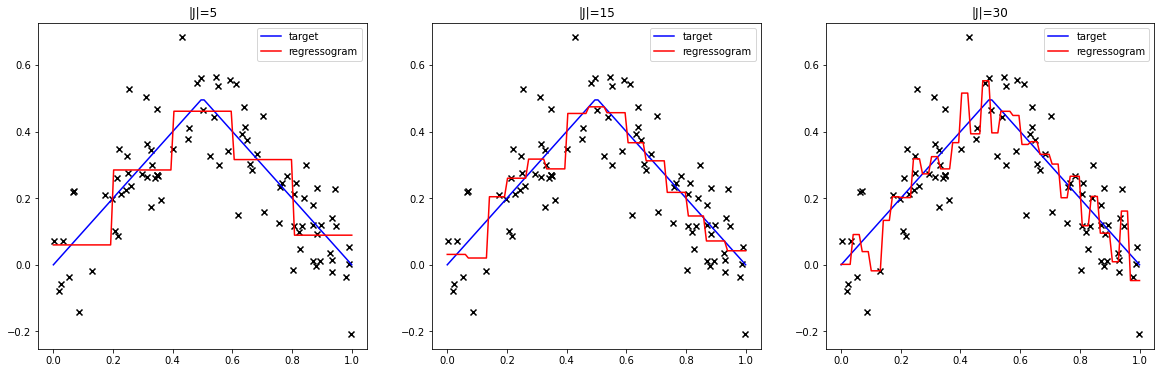

In [4]:
N = 90 # number of data points
P = [5,15,30] # number of partitions
X,y = data_generation(N)

x_f = np.linspace(0,1,100)
y_f = 0.5-abs(x_f-0.5)

plt.figure(figsize=(20,6))
for idx,p in enumerate(P):
    y_values = split_data(X,y,p)
    y_hat = []
    for i in range(100):
        y_hat.append(y_values[math.floor(x_f[i]*p)])
    plt.subplot(130+idx+1)
    plt.scatter(X,y,marker='x',color='k')
    plt.plot(x_f,y_f,'b',label='target')
    plt.plot(x_f,y_hat,'r',label='regressogram')
    plt.title('|J|={}'.format(p))
    plt.legend()

plt.show()

# Figure 6.3: k Nearest Neighbors (k-NN)

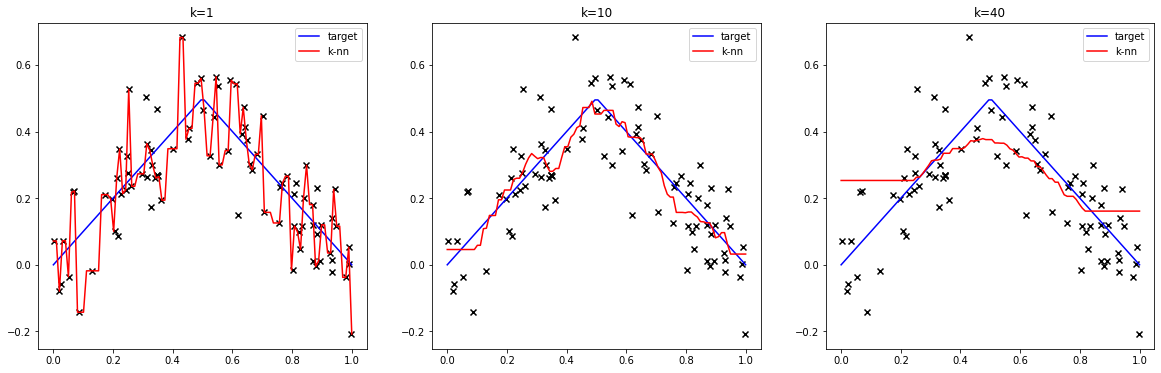

In [5]:
from sklearn.neighbors import KNeighborsRegressor

K = [1,10,40]

plt.figure(figsize=(20,6))
for idx,k in enumerate(K):
    neigh = KNeighborsRegressor(n_neighbors=k)
    X_knn = []
    for i in range(N):
        X_knn.append([X[i]])
    neigh.fit(X_knn,y)
    y_hat = []
    for i in range(100):
        y_hat.append(neigh.predict([[x_f[i]]])[0])
    plt.subplot(130+idx+1)
    plt.scatter(X,y,marker='x',color='k')
    plt.plot(x_f,y_f,'b',label='target')
    plt.plot(x_f,y_hat,'r',label='k-nn')
    plt.title('k={}'.format(k))
    plt.legend()

plt.show()

# Figure 6.4: Nadaraya-Watson

In [6]:
def nadaraya_watson(x_f,h):
    kernel_list = []
    for i in range(N):
        # print(np.exp(-(x_f-X[i])**2 / 2))
        kernel_list.append(np.exp(-(x_f-X[i])**2 / (2 * h**2)))
    numer = np.dot(np.array(kernel_list),np.array(y))
    denom = sum(kernel_list)
    return numer/denom

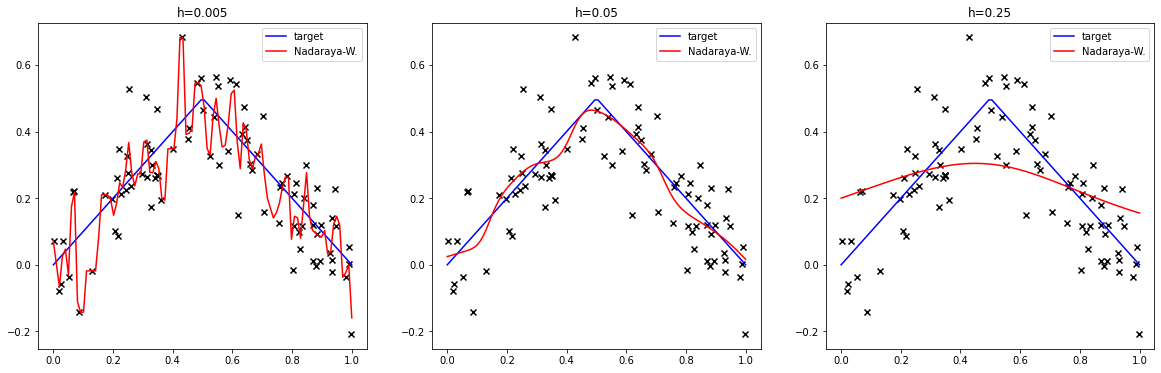

In [7]:
H = [0.005,0.05,0.25]

plt.figure(figsize=(20,6))
for idx,h in enumerate(H):
    y_hat = []
    for i in range(100):
        y_hat.append(nadaraya_watson(x_f[i],h))
    plt.subplot(130+idx+1)
    plt.scatter(X,y,marker='x',color='k')
    plt.plot(x_f,y_f,'b',label='target')
    plt.plot(x_f,y_hat,'r',label='Nadaraya-W.')
    plt.title('h={}'.format(h))
    plt.legend()

plt.show()